In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('countries-aggregated.csv')

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

In [39]:
print(" First 5 rows of the dataset:")
df.head()

 First 5 rows of the dataset:


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [33]:
print("\n Dataset Info:")
print(df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           161568 non-null  datetime64[ns]
 1   Country        161568 non-null  object        
 2   Confirmed      161568 non-null  int64         
 3   Recovered      161568 non-null  int64         
 4   Deaths         161568 non-null  int64         
 5   Month          161568 non-null  period[M]     
 6   Recovery Rate  161568 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1), period[M](1)
memory usage: 8.6+ MB
None


In [32]:
print("\n Summary Statistics:")
print(df.describe())


 Summary Statistics:
                                Date     Confirmed     Recovered  \
count                         161568  1.615680e+05  1.615680e+05   
mean   2021-03-04 11:59:59.999999232  7.361569e+05  1.453967e+05   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-12 18:00:00  1.220000e+03  0.000000e+00   
50%              2021-03-04 12:00:00  2.369200e+04  1.260000e+02   
75%              2021-09-24 06:00:00  2.558420e+05  1.797225e+04   
max              2022-04-16 00:00:00  8.062512e+07  3.097475e+07   
std                              NaN  3.578884e+06  9.748275e+05   

              Deaths  Recovery Rate  
count  161568.000000  161568.000000  
mean    13999.436089      41.071038  
min         0.000000       0.000000  
25%        17.000000       0.000000  
50%       365.000000      31.428571  
75%      4509.000000      86.611213  
max    988609.000000     112.903226  
std     59113.581271      41.154800  


In [31]:
print("\n Missing Values in the Dataset:")
print(df.isnull().sum())


 Missing Values in the Dataset:
Date             0
Country          0
Confirmed        0
Recovered        0
Deaths           0
Month            0
Recovery Rate    0
dtype: int64


In [28]:
top_cases = df.groupby("Country")["Confirmed"].max().sort_values(ascending=False).head(10)

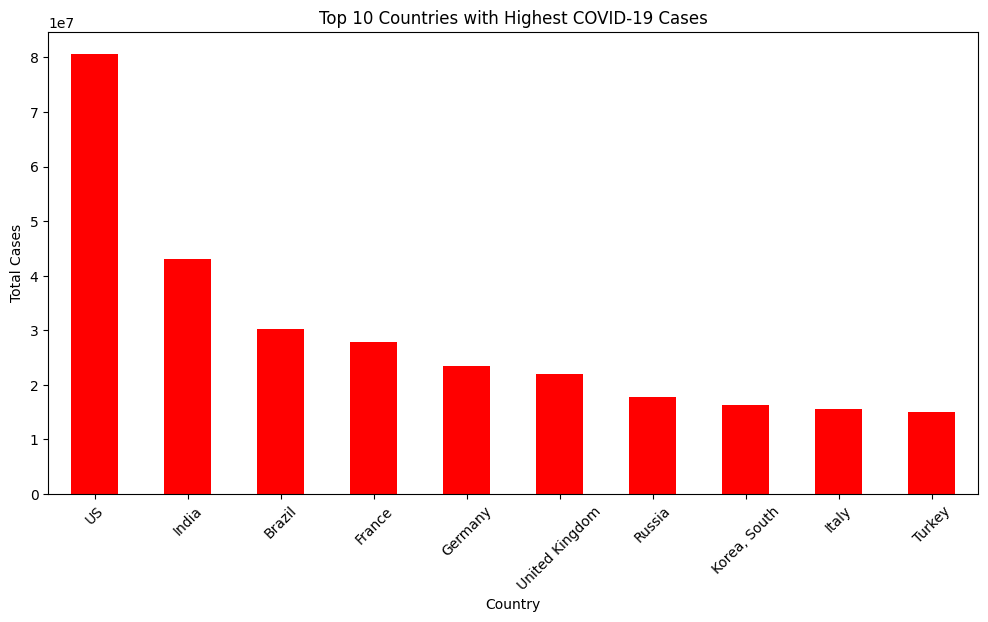

In [29]:
plt.figure(figsize=(12, 6))
top_cases.plot(kind='bar', color='red')
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.title("Top 10 Countries with Highest COVID-19 Cases")
plt.xticks(rotation=45)
plt.show()

In [10]:
top_deaths = df.groupby("Country")["Deaths"].max().sort_values(ascending=False).head(10)

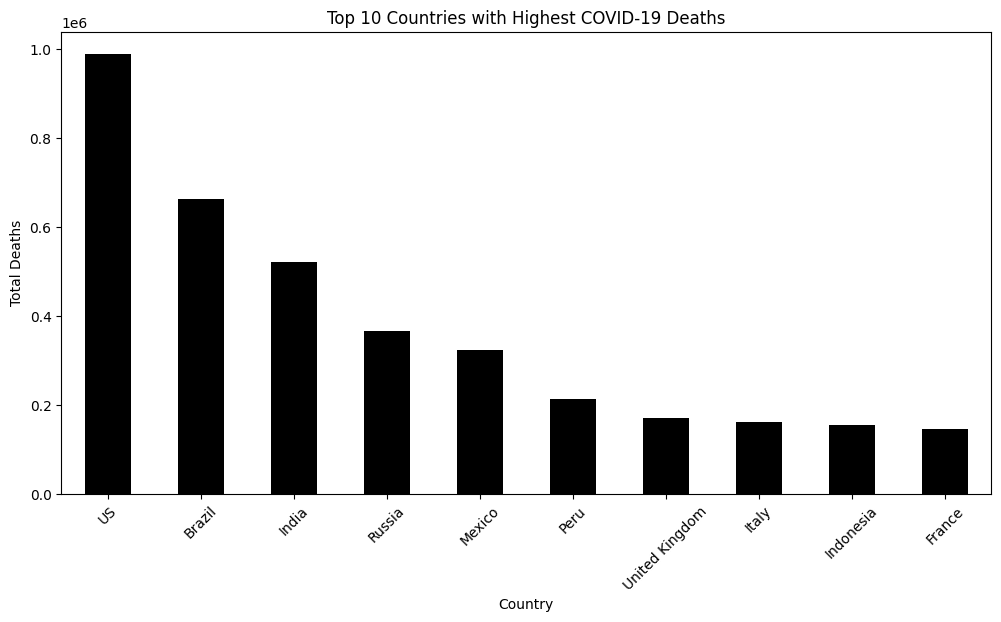

In [11]:
plt.figure(figsize=(12, 6))
top_deaths.plot(kind='bar', color='black')
plt.xlabel("Country")
plt.ylabel("Total Deaths")
plt.title("Top 10 Countries with Highest COVID-19 Deaths")
plt.xticks(rotation=45)
plt.show()

In [12]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_cases = df.groupby("Month")["Confirmed"].sum()

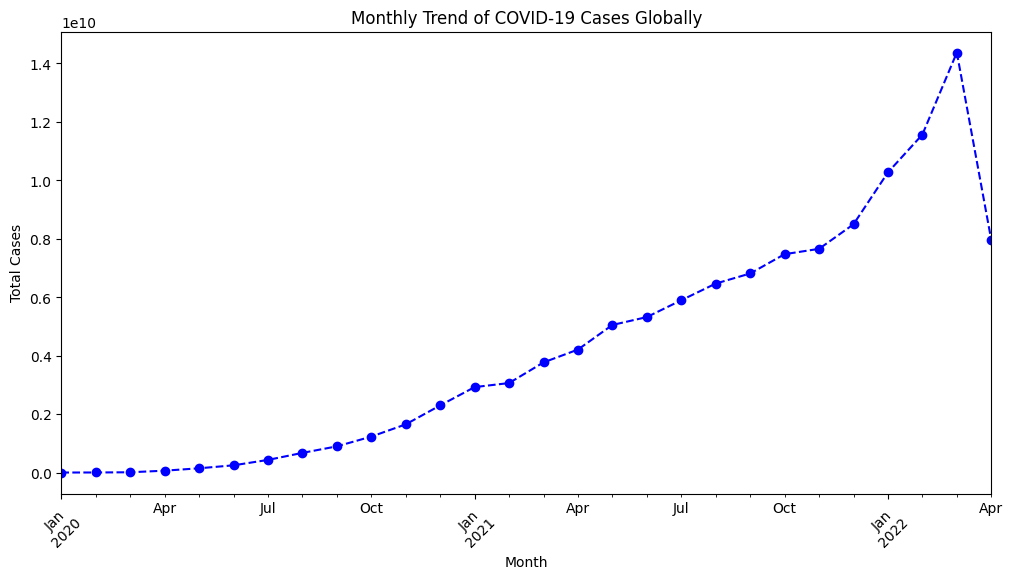

In [13]:
plt.figure(figsize=(12, 6))
monthly_cases.plot(color='blue', marker='o', linestyle='dashed')
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.title("Monthly Trend of COVID-19 Cases Globally")
plt.xticks(rotation=45)
plt.show()

In [26]:
monthly_deaths = df.groupby("Month")["Deaths"].sum()

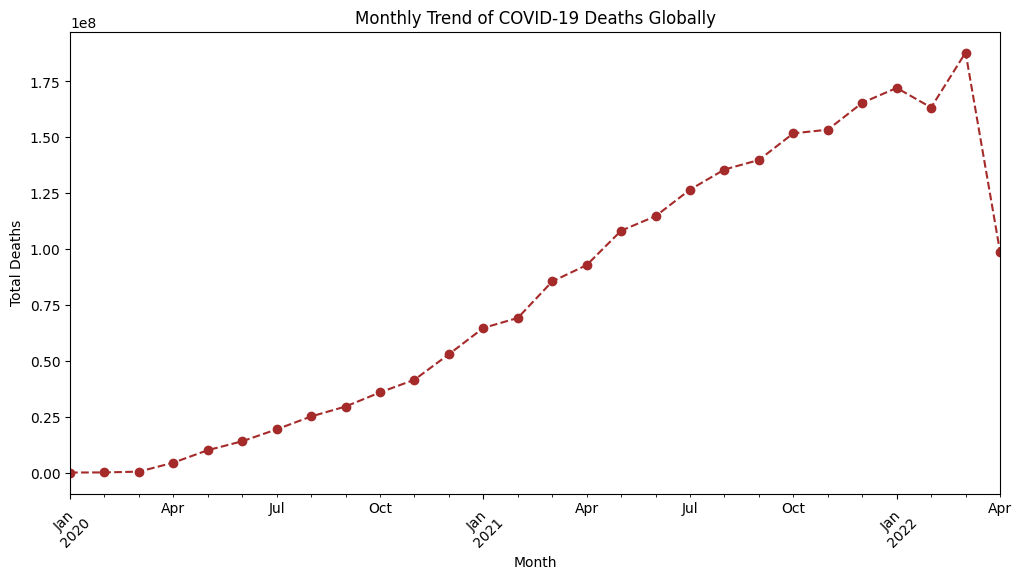

In [27]:
plt.figure(figsize=(12, 6))
monthly_deaths.plot(color='brown', marker='o', linestyle='dashed')
plt.xlabel("Month")
plt.ylabel("Total Deaths")
plt.title("Monthly Trend of COVID-19 Deaths Globally")
plt.xticks(rotation=45)
plt.show()

In [30]:
correlation = df[['Confirmed', 'Deaths']].corr()
print("\n Correlation between Cases and Deaths:")
print(correlation)


 Correlation between Cases and Deaths:
           Confirmed    Deaths
Confirmed   1.000000  0.914993
Deaths      0.914993  1.000000


In [17]:
df["Recovery Rate"] = np.where(df["Confirmed"] > 0, (df["Recovered"] / df["Confirmed"]) * 100, 0)
avg_recovery_rate = df.groupby("Country")["Recovery Rate"].mean().sort_values(ascending=False).head(10)

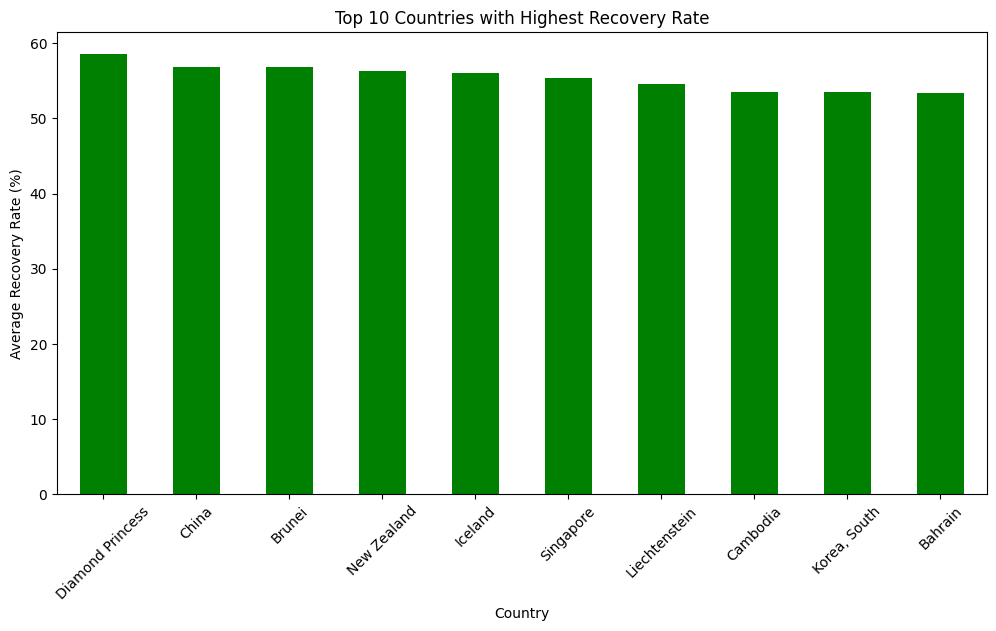

In [18]:
plt.figure(figsize=(12, 6))
avg_recovery_rate.plot(kind='bar', color='green')
plt.xlabel("Country")
plt.ylabel("Average Recovery Rate (%)")
plt.title("Top 10 Countries with Highest Recovery Rate")
plt.xticks(rotation=45)
plt.show()

In [24]:
top_countries = df.groupby("Country")["Confirmed"].max().sort_values(ascending=False).head()


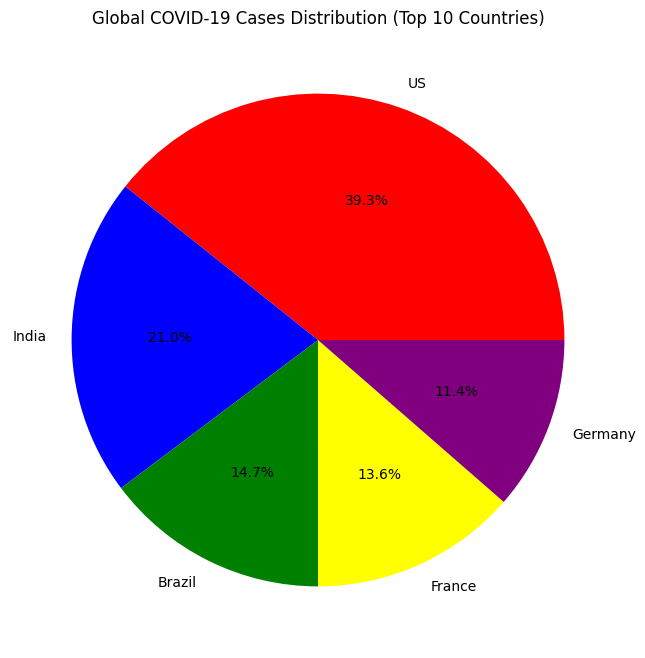

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%',
        colors=['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'orange', 'cyan', 'gray', 'brown'])
plt.title("Global COVID-19 Cases Distribution (Top 10 Countries)")
plt.show()

COVID-19 Data Analysis Completed Successfully!
